In [25]:
%%capture
!pip install --upgrade sklearn
!pip install Arabic-Stopwords
!pip install emoji
!pip install Tashaphyne
!pip install qalsadi
!pip install langdetect
!pip install --upgrade scikit-learn
!pip install nltk
!pip install pandas
!pip install seaborn
!pip install wordcloud
!pip install arabic_reshaper
!pip install python-bidi
!pip install transformers
!pip install tensorflow
!pip install tf-keras
!pip install scipy

# **Importing Libraries**

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [27]:
# Load your Arabic and Turkish datasets
# Replace 'arabic_data.csv' and 'turkish_data.csv' with the paths to your datasets
arabic_df = pd.read_csv('CompanyReviews.csv')
turkish_df = pd.read_csv('TurkishReviews.csv')

# Changing the Turkish comments' colmumn name as the Arabic comments column' name
turkish_df = turkish_df.rename(columns={'Yorum': 'review_description', 'Duygu': 'rating'})

# Add a new column to each dataset to identify the language
arabic_df['language'] = 'Arabic'
turkish_df['language'] = 'Turkish'

# Concatenate the two datasets
df = pd.concat([arabic_df, turkish_df])

df

,Unnamed: 0,review_description,rating,company,language
0,0.0,رائع,1,talbat,Arabic
1,1.0,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat,Arabic
2,2.0,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat,Arabic
3,3.0,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat,Arabic
4,4.0,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat,Arabic
...,...,...,...,...,...
308,NaN,Urun berbat ilk yikamada mahvoldu aldigima pis...,Olumsuz,NaN,Turkish
309,NaN,Resimdeki gibi hic canli degil sert bi kumasa...,Olumsuz,NaN,Turkish
310,NaN,Bir yildiz bile cok bu urun icin internetten a...,Olumsuz,NaN,Turkish
311,NaN,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...,Olumsuz,NaN,Turkish


# **Data Cleaning**

In [28]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Replace the rating values
df['rating'] = df['rating'].replace({1: 'positive', -1: 'negative', 0: 'neutral', 'Olumlu': 'positive' , 'Olumsuz': 'negative', 'Tarafsiz': 'neutral'})
df

,review_description,rating,company,language
0,رائع,positive,talbat,Arabic
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,Arabic
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,Arabic
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat,Arabic
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,Arabic
...,...,...,...,...
308,Urun berbat ilk yikamada mahvoldu aldigima pis...,negative,NaN,Turkish
309,Resimdeki gibi hic canli degil sert bi kumasa...,negative,NaN,Turkish
310,Bir yildiz bile cok bu urun icin internetten a...,negative,NaN,Turkish
311,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...,negative,NaN,Turkish


In [29]:
# Replace NaN values in 'company' column with 'n/a'
df['company'] = df['company'].fillna('n/a')

In [30]:
#display the counts of each category
df['rating'].value_counts()

rating
positive                                                                                                       24080
negative                                                                                                       14322
neutral                                                                                                         1953
3 gun gidiyor. Olumsuz taraflari : Videolari .mov formatinda kaydediyor dolayisiyla boyutlari buyuk oluyor.        1
A                                                                                                                  1
200 olcusu tam                                                                                                     1
Name: count, dtype: int64

In [31]:
# Define the valid ratings
valid_ratings = ['negative', 'positive', 'neutral']

# Keep only the rows in your DataFrame where the 'rating' column is in valid_ratings
df = df[df['rating'].isin(valid_ratings)]

#display the counts of each category
df['rating'].value_counts()

rating
positive    24080
negative    14322
neutral      1953
Name: count, dtype: int64

In [32]:
# Group the DataFrame 'df' by the 'company' column and calculate the size of each group
# This will return a Series with the number of occurrences for each unique 'company' value
df.groupby('company').size()

company
Ezz Steel           49
Raya               268
TMG                250
capiter             73
domty                4
elsewedy           147
hilton             100
n/a                309
nestle              18
swvl              4693
talbat           32073
telecom_egypt     2090
venus              281
dtype: int64

In [33]:
# display the sum of null values in each column
df.isnull().sum()

review_description    2
rating                0
company               0
language              0
dtype: int64

In [34]:
# dropping rows that has null values in review_description column
df = df.dropna(subset=['review_description'])
df.isnull().sum()

review_description    0
rating                0
company               0
language              0
dtype: int64

In [35]:
# display the sum of duplicates in reviews
df.review_description.duplicated().sum()

1046

In [36]:
# deleting rows that has the same reviews
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)
df.review_description.duplicated().sum()

0

In [37]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)
df

,review_description,rating,company,language
0,رائع,positive,talbat,Arabic
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,Arabic
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,Arabic
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat,Arabic
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,Arabic
...,...,...,...,...
39302,Urun berbat ilk yikamada mahvoldu aldigima pis...,negative,n/a,Turkish
39303,Resimdeki gibi hic canli degil sert bi kumasa...,negative,n/a,Turkish
39304,Bir yildiz bile cok bu urun icin internetten a...,negative,n/a,Turkish
39305,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU. ...,negative,n/a,Turkish


## **Visualization**

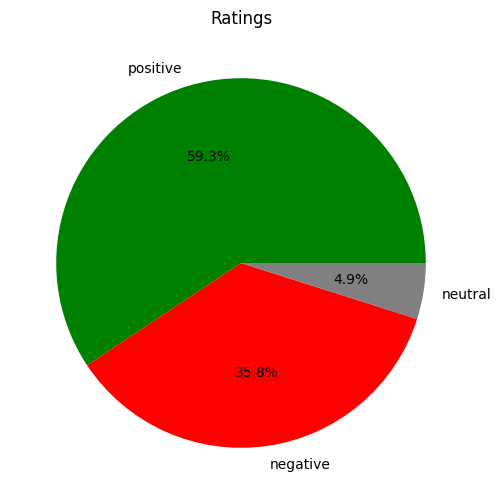

In [38]:
# Count the number of occurrences of each rating
rating_counts = df['rating'].value_counts()

# Define a color for each rating
colors = ['green' if label == 'positive'
          else 'red' if label == 'negative'
          else 'gray'
          for label in rating_counts.index]

# Create the pie chart
plt.figure(figsize=(10,6))
plt.pie(rating_counts, labels = rating_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Ratings')
plt.show()

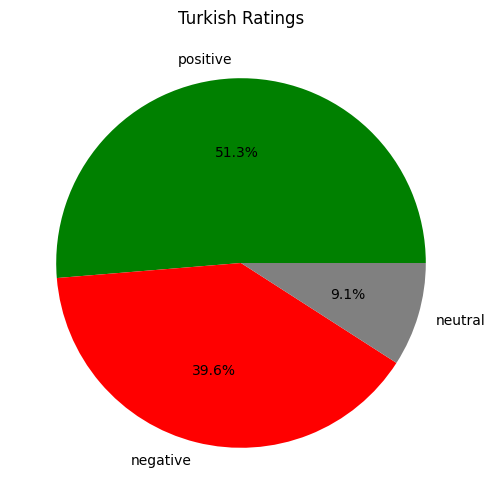

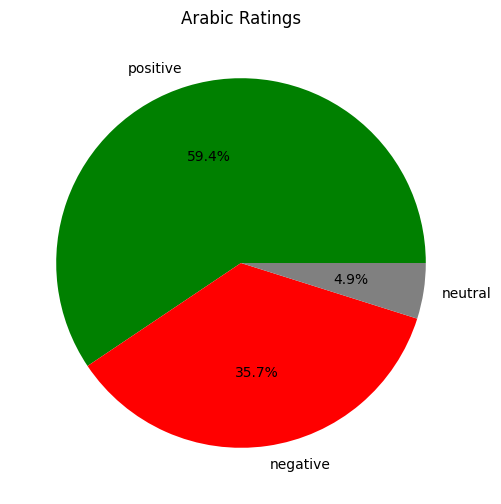

In [39]:
# Assuming 'language' is the name of the column with language labels
# and 'rating' is the name of the column with rating labels

# Filter the DataFrame for Turkish language reviews and count the ratings
turkish_ratings = df[df['language'] == 'Turkish']['rating'].value_counts()

# Define a color for each Turkish rating
turkish_colors = ['green' if label == 'positive'
                  else 'red' if label == 'negative'
                  else 'gray'
                  for label in turkish_ratings.index]

# Create the pie chart for Turkish ratings
plt.figure(figsize=(10,6))
plt.pie(turkish_ratings, labels = turkish_ratings.index, autopct='%1.1f%%', colors=turkish_colors)
plt.title('Turkish Ratings')
plt.show()

# Filter the DataFrame for Arabic language reviews and count the ratings
arabic_ratings = df[df['language'] == 'Arabic']['rating'].value_counts()

# Define a color for each Arabic rating
arabic_colors = ['green' if label == 'positive'
                 else 'red' if label == 'negative'
                 else 'gray'
                 for label in arabic_ratings.index]

# Create the pie chart for Arabic ratings
plt.figure(figsize=(10,6))
plt.pie(arabic_ratings, labels = arabic_ratings.index, autopct='%1.1f%%', colors=arabic_colors)
plt.title('Arabic Ratings')
plt.show()


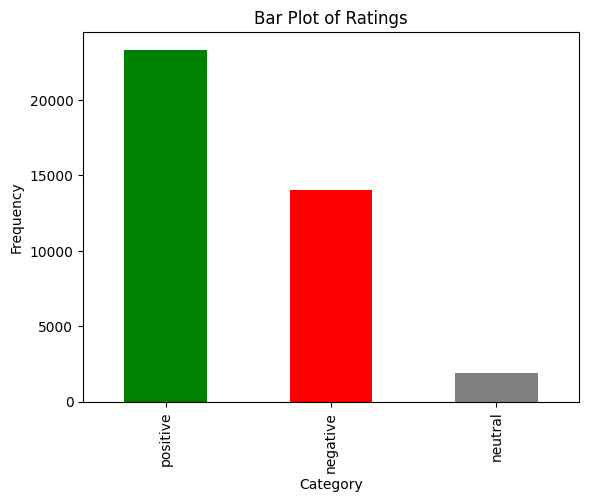

In [40]:
# Get the value counts
rating_counts = df['rating'].value_counts()

# Define a color for each rating
colors = ['green' if label == 'positive'
          else 'red' if label == 'negative'
          else 'gray'
          for label in rating_counts.index]

# Create the bar plot
rating_counts.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot of Ratings')
plt.show()


In [41]:
df.company.unique()

array(['talbat', 'swvl', 'venus', 'Raya', 'telecom_egypt', 'hilton',
       'domty', 'nestle', 'elsewedy', 'capiter', 'TMG', 'Ezz Steel',
       'n/a'], dtype=object)

# **Data Preprocessing**

In [42]:
df.review_description=df.review_description.astype(str)
df.review_description=df.review_description.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
df.review_description=df.review_description.apply(lambda x:x.replace('؛',"", ))
df

,review_description,rating,company,language
0,رائع,positive,talbat,Arabic
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,Arabic
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,Arabic
3,لماذا لا يمكننا طلب من ماكدونالدز,negative,talbat,Arabic
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,Arabic
...,...,...,...,...
39302,Urun berbat ilk yikamada mahvoldu aldigima pis...,negative,n/a,Turkish
39303,Resimdeki gibi hic canli degil sert bi kumasa...,negative,n/a,Turkish
39304,Bir yildiz bile cok bu urun icin internetten a...,negative,n/a,Turkish
39305,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU ...,negative,n/a,Turkish


In [43]:
# Load the stop words with the correct encoding
with open('arabic.txt', 'r', encoding='utf-8') as f:
    arabic_stopwords = f.read().splitlines()

with open('turkish.txt', 'r', encoding='utf-8') as f:
    turkish_stopwords = f.read().splitlines()

#Some words needed to work with to will remove
for word in ['لا','لكن']:
    arabic_stopwords.remove(word)

# Combine the stop words into one list
all_stopwords = arabic_stopwords + turkish_stopwords

In [44]:
df.review_description = df.review_description.apply(lambda x:" ".join([word for word in x.split() if word not in all_stopwords]))

df

,review_description,rating,company,language
0,رائع,positive,talbat,Arabic
1,برنامج رائع جدا يساعد تلبيه الاحتياجات اسرع,positive,talbat,Arabic
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,Arabic
3,لماذا لا يمكننا طلب ماكدونالدز,negative,talbat,Arabic
4,البرنامج بيظهر المطاعم مغلقه بتكون فاتحه بقاله...,negative,talbat,Arabic
...,...,...,...,...
39302,Urun berbat ilk yikamada mahvoldu aldigima pis...,negative,n/a,Turkish
39303,Resimdeki hic canli degil sert bi kumasa sahip...,negative,n/a,Turkish
39304,Bir yildiz bile cok urun icin internetten aldi...,negative,n/a,Turkish
39305,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU F...,negative,n/a,Turkish


In [45]:
# Handling Emojis in reviews
arabic_emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "☺":"يضحك",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "👍🏻": "تمام",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "😧" : "قلق و صدمة",
    "❗️" :"تعجب",
    "👐🏽":"ايدي مفتوحه",
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "🎀":    "ورده",
    "💵":  "فلوس",
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "❌":"رفض",
    "👌🏼":"احسنت",
    "😮":"صدمة",
    "😦":"قلق",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "❤︎":"حب",
    "🙏🏼":"رجاء طلب",
    "‼":"تعجب",
    "♥️":"حب",
    "💩":"معترض",
    "🌟":"نجمة",
    "👊🏼":"ضرب",
    "👊":"ضربة",
    "😚":"حب",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🔥":"حريق",
    "😬":"عدم الراحة",
    "👊🏿":"يضرب",
    "✋🏼":"كف ايد",
    "☠️":"وجه مرعب",
    "🎉":"يهنئ",
    "😿":"وجه حزين",
    "☹️":"وجه يائس",
    "😘" :"حب",
    "😰" :"خوف و حزن",
    "🌼":"ورده",
    "💋":  "بوسه",
    "❣️":"حب",
    "😇":"دايخ",
    "😈":"رعب",
    "❗️":"تعجب",
    "👎":"غير موافق",
    "😯":"متفاجأ",
    "😻":"اعجاب",
    "💪🏽":"قوه",
    "😤":"وجه عابس",
    "😹":"ضحك",
    "💓":"حب",
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    }

turkish_emojis = {
    "🙂": "Gülümseme",
    "😂": "Kahkaha",
    "💔": "Kırık Kalp",
    "❤️": "Aşk",
    "😍": "Aşık Olmuş",
    "😭": "Ağlama",
    "😢": "Üzgün",
    "😔": "Düşünceli",
    "♥": "Aşk",
    "💜": "Aşk",
    "😅": "Terli Gülümseme",
    "🙁": "Üzgün",
    "💕": "Aşk",
    "💙": "Aşk",
    "😞": "Üzgün",
    "😊": "Mutluluk",
    "👏": "Alkış",
    "👌": "Mükemmel",
    "😴": "Uyku",
    "😀": "Kahkaha",
    "😌": "Rahatlamış",
    "🌹": "Gül",
    "🙈": "Utangaç",
    "😄": "Kahkaha",
    "😐": "Nötr",
    "✌": "Zafer",
    "✨": "Parıltı",
    "🤔": "Düşünce",
    "😏": "Küstah",
    "😒": "Rahatsız",
    "🙄": "Sıkılmış",
    "😕": "Hayal Kırıklığı",
    "😃": "Kahkaha",
    "🌸": "Çiçek",
    "😓": "Üzgün",
    "💞": "Aşk",
    "💗": "Aşk",
    "😑": "Rahatsız",
    "😎": "Havalı",
    "💛": "Aşk",
    "😩": "Yorgun",
    "💪": "Güç",
    "👍": "Onay",
    "🙏🏻": "Dua",
    "😳": "Şaşkın",
    "👏🏼": "Alkış",
    "🌚": "Gizemli",
    "💚": "Aşk",
    "🙏": "Dua",
    "💘": "Aşk",
    "☺": "Gülümseme",
    "😶": "Şaşkın",
    "✌️": "Eğlence",
    "✋🏻": "Dur",
    "😉": "Göz Kırpma",
    "🌷": "Çiçek",
    "🙃": "Ters Gülümseme",
    "😫": "Yorgun",
    "😨": "Korkmuş",
    "💟": "Aşk",
    "😪": "Uykulu",
    "😆": "Kahkaha",
    "😣": "Üzgün",
    "☺️": "Gülümseme",
    "😱": "Panik",
    "😁": "Kahkaha",
    "😖": "Rahatsız",
    "🏃🏼": "Koşu",
    "😡": "Öfkeli",
    "🚶": "Yürüme",
    "🤕": "Yaralı",
    "‼️": "Ünlem",
    "👌🏻": "Mükemmel",
    "❣": "Aşk",
    "🙊": "Sessiz",
    "💃": "Dans",
    "💃🏼": "Dans",
    "😜": "Şakacı",
    "👊": "Yumruk",
    "😟": "Endişeli",
    "💖": "Aşk",
    "😥": "Üzgün",
    "💎": "Elmas",
    "😷": "Hasta",
    "⚠️": "Uyarı",
    "🤗": "Sarılmak",
    "✖️": "Yanlış",
    "👑": "Taç",
    "✔️": "Doğru",
    "💌": "Mektup",
    "😲": "Şaşkın",
    "🚫": "Yasak",
    "👏🏻": "Alkış",
    "👍🏻": "Onay",
    "✌🏼": "Zafer İşareti",
    "🌝": "Gülümseme",
    "😧": "Endişeli",
    "❗️": "Ünlem",
    "👐🏽": "Açık Eller",
    "👌🏽": "Tamam",
    "⁉️": "Soru Ünlem",
    "🎀": "Kurdele",
    "💵": "Para",
    "😋": "Lezzetli",
    "😛": "Dil Çıkarma",
    "😠": "Kızgın",
    "❌": "Yanlış",
    "👌🏼": "Mükemmel",
    "😮": "Şaşkın",
    "😦": "Endişeli",
    "🐤": "Kuş",
    "💫": "Baş Dönmesi",
    "💝": "Hediye Kalbi",
    "❤︎": "Aşk",
    "🙏🏼": "Dua",
    "‼": "Ünlem",
    "♥️": "Aşk",
    "💩": "Bok",
    "🌟": "Yıldız",
    "👊🏼": "Yumruk",
    "😚": "Öpücük",
    "👎🏻": "Beğenmeme",
    "👊🏽": "Yumruk",
    "😙": "Öpücük",
    "👏🏽": "Alkış",
    "💪🏻": "Güç",
    "🔥": "Ateş",
    "😬": "Sıkıntı",
    "👊🏿": "Yumruk",
    "✋🏼": "El",
    "☠️": "Kafatası",
    "🎉": "Kutlama",
    "😿": "Ağlayan Kedi",
    "☹️": "Üzgün Yüz",
    "😘": "Öpücük",
    "😰": "Endişeli",
    "🌼": "Çiçek",
    "💋": "Öpücük",
    "❣️": "Aşk",
    "😇": "Masum",
    "😈": "Şeytan",
    "👎": "Beğenmeme",
    "😯": "Şaşkın",
    "😻": "Kalp Gözlü Kedi",
    "💪🏽": "Güç",
    "😤": "Buğulu Nefes",
    "😹": "Gülen Kedi",
    "💓": "Kalp Atışı",
    "👻": "Hayalet",
    "❎": "Yanlış",
    "🤮": "Kusma",
}


emotions_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "🎵",
    "♡" : "❤️",
    "☻"  : "🙂",
}


In [46]:
from langdetect import detect, LangDetectException
import emoji

def emoticons_to_emoji(text):
    for emoticon, emoji in emotions_to_emoji.items():
        text = text.replace(emoticon, emoji)
    return text

def checkemojie(text, lang):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)):
            if lang == 'ar':
                if char in arabic_emojis.keys():
                    emojistext.append(arabic_emojis[emoji.distinct_emoji_list(char)[0]])
            else:
                if char in turkish_emojis.keys():
                    emojistext.append(turkish_emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)

def emojiTextTransform(text):
    text = emoticons_to_emoji(text)  # Transform emoticons to emojis
    cleantext = re.sub(r'[^\w\s]', '', text)
    try:
        lang = detect(cleantext)  # Detect the language of the text
    except LangDetectException:
        lang = 'unknown'
    return cleantext + " " + checkemojie(text, lang)




emojiTextTransform(df.review_description[71])

'جحهنناغنمجظ جحختاىةزونه جائع جائع جائع جائع جائع جائع جائع جائع جائع'

In [47]:
emojiTextTransform(df.review_description[38999])

'Urun sorunsuz elime ulasti Is yerim icin aldim cok memnunum  Kahkaha'

In [48]:
df.review_description=df.review_description.apply(lambda x:emojiTextTransform(x))
df.review_description[71]

'جحهنناغنمجظ جحختاىةزونه جائع جائع جائع جائع جائع جائع جائع جائع جائع'

In [49]:
df.review_description.duplicated().sum()

1149

In [50]:
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [51]:
# remove digits
df.review_description=df.review_description.apply(lambda x:''.join([word for word in x if not word.isdigit()]))

In [52]:
#applying lemmatizer
import qalsadi.lemmatizer
lemmer = qalsadi.lemmatizer.Lemmatizer()

In [53]:
df.review_description=df.review_description.apply(lambda x:lemmer.lemmatize_text(x))
df

,review_description,rating,company,language
0,[رائع],positive,talbat,Arabic
1,"[برنامج, رائع, جدا, ساعد, ألب, احتياج, سرع]",positive,talbat,Arabic
2,"[تطبيق, لا, يغتح, دائم, بيعطيني, لا, أوجد, اتص...",negative,talbat,Arabic
3,"[لماذا, لا, أمكن, طلب, ماكدونالدز]",negative,talbat,Arabic
4,"[برنامج, بيظهر, مطاعم, مغلق, تكون, فاتح, بقال,...",negative,talbat,Arabic
...,...,...,...,...
39302,"[Urun, berbat, ilk, yikamada, mahvoldu, aldigi...",negative,n/a,Turkish
39303,"[Resimdeki, hic, canli, degil, sert, bi, kumas...",negative,n/a,Turkish
39304,"[Bir, yildiz, bile, cok, urun, icin, internett...",negative,n/a,Turkish
39305,"[URUN, KULLANMADAN, EVVEL, KI, ILK, YIKAMADA, ...",negative,n/a,Turkish


In [54]:
df.review_description=df.review_description.apply(lambda x:" ".join(x))
df

,review_description,rating,company,language
0,رائع,positive,talbat,Arabic
1,برنامج رائع جدا ساعد ألب احتياج سرع,positive,talbat,Arabic
2,تطبيق لا يغتح دائم بيعطيني لا أوجد اتصال شبكة ...,negative,talbat,Arabic
3,لماذا لا أمكن طلب ماكدونالدز,negative,talbat,Arabic
4,برنامج بيظهر مطاعم مغلق تكون فاتح بقال دهي اكت...,negative,talbat,Arabic
...,...,...,...,...
39302,Urun berbat ilk yikamada mahvoldu aldigima pis...,negative,n/a,Turkish
39303,Resimdeki hic canli degil sert bi kumasa sahip...,negative,n/a,Turkish
39304,Bir yildiz bile cok urun icin internetten aldi...,negative,n/a,Turkish
39305,URUN KULLANMADAN EVVEL KI ILK YIKAMADA SOLDU F...,negative,n/a,Turkish


In [55]:
df.review_description.duplicated().sum()

1248

In [56]:
df.drop(df[df.review_description.duplicated() == True].index, axis = 0, inplace = True)

In [57]:
df.review_description.duplicated().sum()

0

In [58]:
df.review_description.isnull().sum()

0

In [59]:
import arabic_reshaper
from bidi.algorithm import get_display

# Function to reshape and apply bidi support to Arabic text
def reshape_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# Apply the reshaping function to the Arabic text only
arabic_reviews = ' '.join(df[df['language'] == 'Arabic']['review_description'])
reshaped_arabic_reviews = reshape_arabic_text(arabic_reviews)


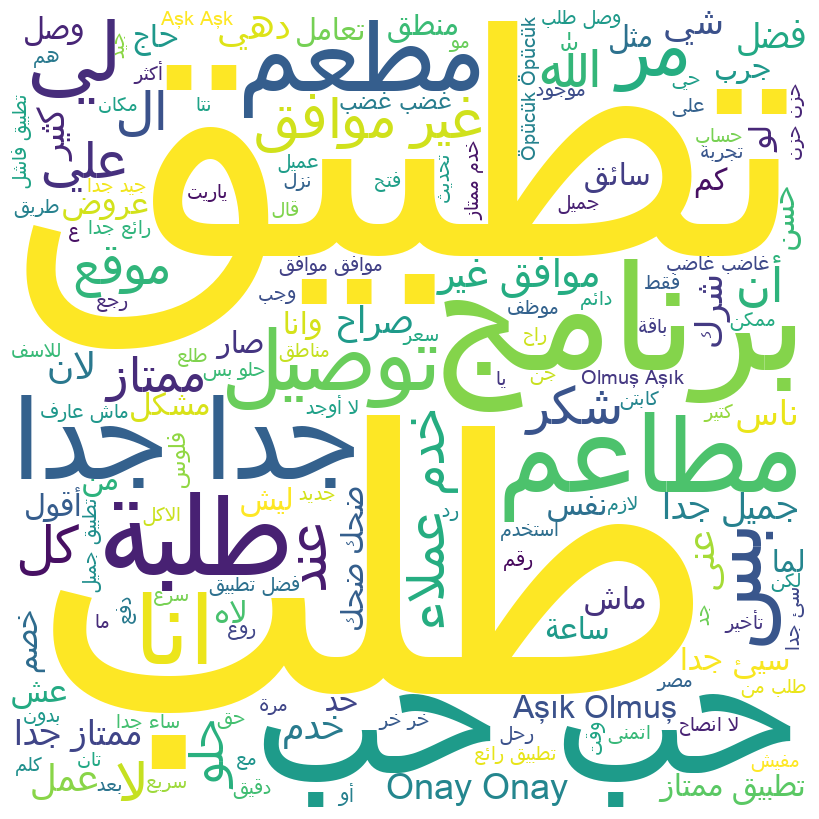

In [60]:
from wordcloud import WordCloud
# Generate the word cloud using an Arabic font
wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    stopwords = all_stopwords,
    min_font_size = 10,
    font_path=r'C:\Users\Tameem\Arial Unicode MS Regular.ttf'  # Specify the path to an Arabic font
).generate(reshaped_arabic_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [83]:
from scipy.sparse import hstack
import numpy as np
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and it has a 'language' column to distinguish between Turkish and Arabic
turkish_texts = df[df['language'] == 'Turkish']['review_description']
arabic_texts = df[df['language'] == 'Arabic']['review_description']

# Vectorize Turkish texts
turkish_vectorizer = TfidfVectorizer()
turkish_features = turkish_vectorizer.fit_transform(turkish_texts)

# Optionally, vectorize Arabic texts
arabic_vectorizer = TfidfVectorizer(max_features=10000)
arabic_features = arabic_vectorizer.fit_transform(arabic_texts)

# Now, 'turkish_features' contains the TF-IDF features for Turkish texts,
# and 'arabic_features' contains the TF-IDF features for Arabic texts.


# for Turkish and Arabic texts respectively
turkish_feature_names = turkish_vectorizer.get_feature_names_out()
arabic_feature_names = arabic_vectorizer.get_feature_names_out()


In [65]:
def label_to_num(label):
    return {'negative': -1, 'neutral': 0, 'positive': 1}[label]

df['rating'] = df['rating'].apply(label_to_num)  # Convert string labels to numerical values

In [66]:
# remap the class labels in the ‘rating’ column of the DataFrame, it maps -1 to 0, 0 to 1, and 1 to 2
def mappingclasses(classx):
    return {-1:0,0:1,1:2}[classx]
df['rating']=df['rating'].apply(lambda x:mappingclasses(x))



In [84]:
# Create a DataFrame with the feature names as columns
X1 = pd.DataFrame(arabic_features.toarray(),columns=arabic_feature_names)
X2= pd.DataFrame(turkish_features.toarray(),columns=turkish_feature_names)

In [85]:
Y=df.rating

In [86]:
from sklearn.model_selection import train_test_split
# Assuming 'df' has a 'rating' column with labels and a 'language' column to distinguish languages
arabic_labels = df[df['language'] == 'Arabic']['rating']
turkish_labels = df[df['language'] == 'Turkish']['rating']

# Split the Arabic data
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, arabic_labels, random_state=42, test_size=0.20, shuffle=True)

# Split the Turkish data
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, turkish_labels, random_state=42, test_size=0.20, shuffle=True)


# **Modelling**

In [73]:
import numpy as np
from sklearn import metrics
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report , roc_curve, f1_score, accuracy_score, recall_score, precision_score, roc_auc_score,make_scorer,mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV


def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))

    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print("                      Traing Classification Report                      ")
    print(classification_report(y_train,  trained_model.predict(x_train)))
    print("                      Testing Classification Report                      ")
    print(classification_report(y_test,  trained_model.predict(x_test)))

# **Random Forrest**

Testing accuracy   : 81.88772025679552 %
Training accuracy  : 98.42901540247942 %
precision :  0.8188772025679552
recall    :  0.8188772025679552
f1_score  :  0.8188772025679552


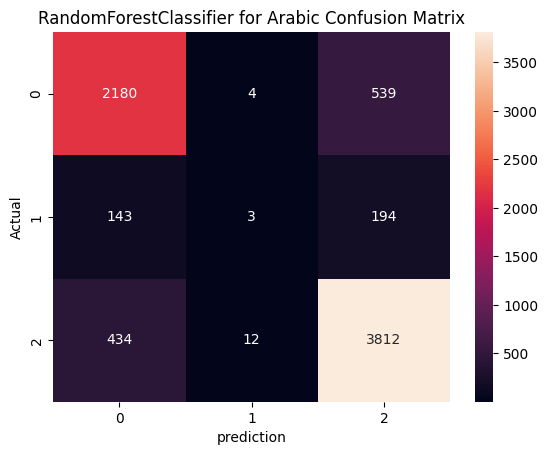

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     10863
           1       1.00      0.94      0.97      1478
           2       0.98      1.00      0.99     16940

    accuracy                           0.98     29281
   macro avg       0.99      0.97      0.98     29281
weighted avg       0.98      0.98      0.98     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2723
           1       0.16      0.01      0.02       340
           2       0.84      0.90      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.60      0.57      0.56      7321
weighted avg       0.79      0.82      0.80      7321



In [94]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
trained_clf_random_forest1 = RandomForestClassifier().fit(x1_train, y1_train)
get_accuracy('RandomForestClassifier for Arabic',trained_clf_random_forest1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 80.64516129032258 %
Training accuracy  : 100.0 %
precision :  0.8064516129032258
recall    :  0.8064516129032258
f1_score  :  0.8064516129032258


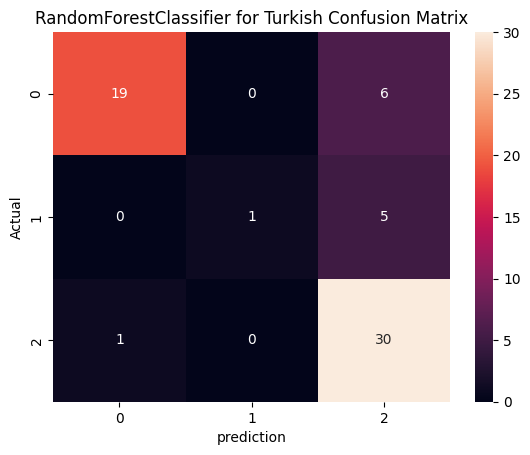

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       127

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       1.00      0.17      0.29         6
           2       0.73      0.97      0.83        31

    accuracy                           0.81        62
   macro avg       0.89      0.63      0.65        62
weighted avg       0.85      0.81      0.78        62



In [87]:
trained_clf_random_forest2 = RandomForestClassifier().fit(x2_train, y2_train)
get_accuracy('RandomForestClassifier for Turkish',trained_clf_random_forest2,x2_train, y2_train, x2_test, y2_test)

# **Naive Bayes**

Testing accuracy   : 82.36579702226472 %
Training accuracy  : 85.20542331204535 %
precision :  0.8236579702226472
recall    :  0.8236579702226472
f1_score  :  0.8236579702226472


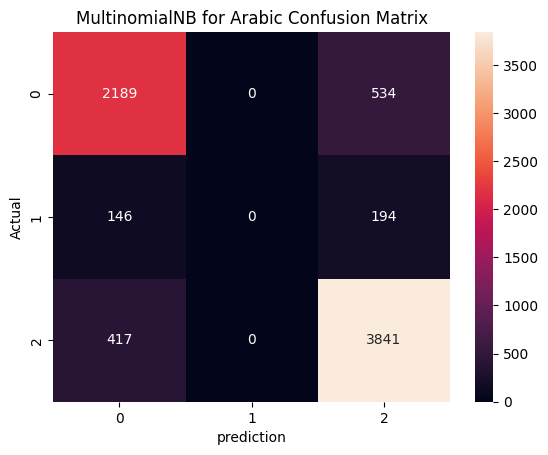

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     10863
           1       1.00      0.00      0.00      1478
           2       0.86      0.93      0.89     16940

    accuracy                           0.85     29281
   macro avg       0.90      0.59      0.58     29281
weighted avg       0.86      0.85      0.83     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2723
           1       0.00      0.00      0.00       340
           2       0.84      0.90      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.55      0.57      0.56      7321
weighted avg       0.78      0.82      0.80      7321



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [88]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb1 = MultinomialNB().fit(x1_train, y1_train)
get_accuracy('MultinomialNB for Arabic',trained_clf_multinomial_nb1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 82.25806451612904 %
Training accuracy  : 91.05691056910568 %
precision :  0.8225806451612904
recall    :  0.8225806451612904
f1_score  :  0.8225806451612904


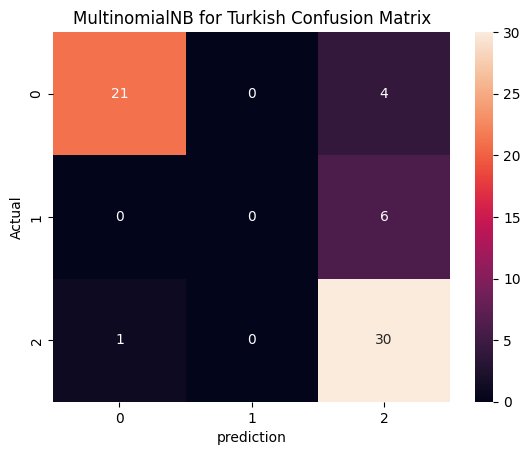

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        97
           1       0.00      0.00      0.00        22
           2       0.89      1.00      0.94       127

    accuracy                           0.91       246
   macro avg       0.61      0.67      0.64       246
weighted avg       0.83      0.91      0.87       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.00      0.00      0.00         6
           2       0.75      0.97      0.85        31

    accuracy                           0.82        62
   macro avg       0.57      0.60      0.58        62
weighted avg       0.76      0.82      0.78        62



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [89]:
trained_clf_multinomial_nb2 = MultinomialNB().fit(x2_train, y2_train)
get_accuracy('MultinomialNB for Turkish',trained_clf_multinomial_nb2,x2_train, y2_train, x2_test, y2_test)

# **Linear SVC**

C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Testing accuracy   : 81.95601693757683 %
Training accuracy  : 90.20866773675762 %
precision :  0.8195601693757684
recall    :  0.8195601693757684
f1_score  :  0.8195601693757684


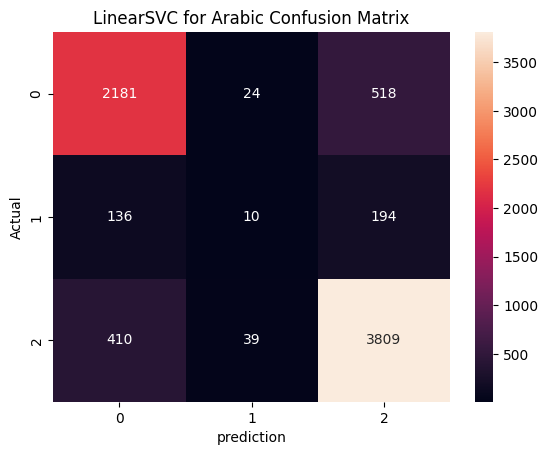

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10863
           1       0.93      0.30      0.45      1478
           2       0.90      0.96      0.93     16940

    accuracy                           0.90     29281
   macro avg       0.91      0.72      0.76     29281
weighted avg       0.90      0.90      0.89     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2723
           1       0.14      0.03      0.05       340
           2       0.84      0.89      0.87      4258

    accuracy                           0.82      7321
   macro avg       0.59      0.57      0.57      7321
weighted avg       0.79      0.82      0.80      7321



In [90]:
from sklearn.svm import LinearSVC
trained_clf_svc1 = LinearSVC().fit(x1_train, y1_train)
get_accuracy('LinearSVC for Arabic',trained_clf_svc1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 83.87096774193549 %
Training accuracy  : 100.0 %
precision :  0.8387096774193549
recall    :  0.8387096774193549
f1_score  :  0.8387096774193549


C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


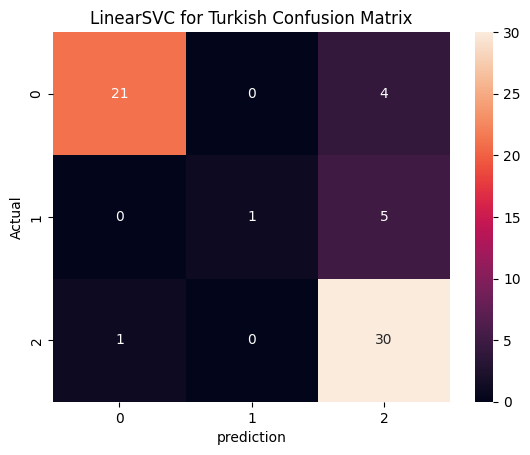

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00       127

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       1.00      0.17      0.29         6
           2       0.77      0.97      0.86        31

    accuracy                           0.84        62
   macro avg       0.91      0.66      0.68        62
weighted avg       0.87      0.84      0.82        62



In [91]:
trained_clf_svc2 = LinearSVC().fit(x2_train, y2_train)
get_accuracy('LinearSVC for Turkish',trained_clf_svc2,x2_train, y2_train, x2_test, y2_test)

# **Logistic Regression**

Testing accuracy   : 83.00778582160908 %
Training accuracy  : 86.9915644957481 %
precision :  0.8300778582160907
recall    :  0.8300778582160907
f1_score  :  0.8300778582160907


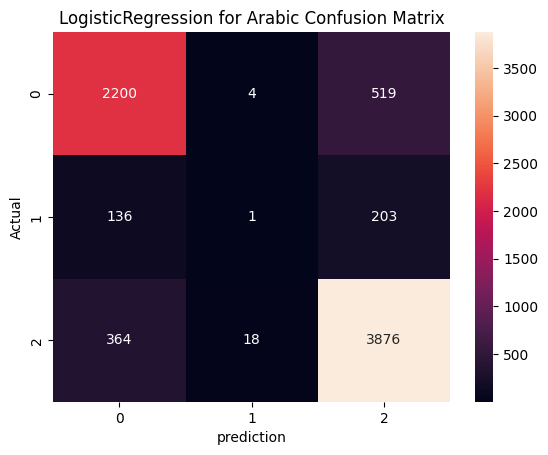

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     10863
           1       0.73      0.05      0.09      1478
           2       0.87      0.94      0.91     16940

    accuracy                           0.87     29281
   macro avg       0.82      0.62      0.62     29281
weighted avg       0.86      0.87      0.85     29281

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2723
           1       0.04      0.00      0.01       340
           2       0.84      0.91      0.88      4258

    accuracy                           0.83      7321
   macro avg       0.57      0.57      0.56      7321
weighted avg       0.80      0.83      0.81      7321



In [92]:
from sklearn.linear_model import LogisticRegression
trained_clf_LogisticRegression1 = LogisticRegression().fit(x1_train, y1_train)
get_accuracy('LogisticRegression for Arabic',trained_clf_LogisticRegression1,x1_train, y1_train, x1_test, y1_test)

Testing accuracy   : 79.03225806451613 %
Training accuracy  : 91.869918699187 %
precision :  0.7903225806451613
recall    :  0.7903225806451613
f1_score  :  0.7903225806451613


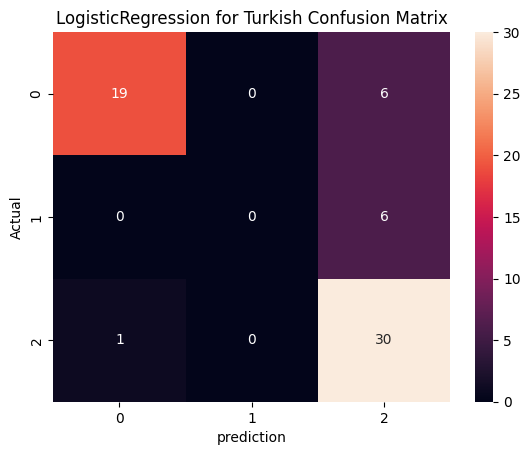

                      Traing Classification Report                      
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        97
           1       1.00      0.09      0.17        22
           2       0.91      1.00      0.95       127

    accuracy                           0.92       246
   macro avg       0.95      0.70      0.69       246
weighted avg       0.93      0.92      0.89       246

                      Testing Classification Report                      
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.00      0.00      0.00         6
           2       0.71      0.97      0.82        31

    accuracy                           0.79        62
   macro avg       0.55      0.58      0.56        62
weighted avg       0.74      0.79      0.75        62



C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

In [93]:
trained_clf_LogisticRegression2 = LogisticRegression().fit(x2_train, y2_train)
get_accuracy('LogisticRegression for Turkish',trained_clf_LogisticRegression2,x2_train, y2_train, x2_test, y2_test)

# **BERT**

In [116]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

#Load the Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=3)

C:\Users\Tameem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [125]:
# Select all Turkish reviews
turkish_reviews = df[df['language'] == 'Turkish']

# Randomly select 20,000 Arabic reviews
arabic_reviews = df[df['language'] == 'Arabic'].sample(n=3000, random_state=42)

# Combine both Turkish and Arabic reviews into one DataFrame
selected_reviews = pd.concat([turkish_reviews, arabic_reviews])

# Assuming 'rating' is the name of the column with ratings
selected_ratings = df.loc[selected_reviews.index, 'rating']

xx_train, xx_test, yy_train, yy_test = train_test_split(selected_reviews['review_description'], selected_ratings, test_size=0.2, random_state=42)

In [126]:
# Tokenize the text
train_encodings = tokenizer(xx_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(xx_test.tolist(), truncation=True, padding=True, max_length=128)

In [127]:
# Convert to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    yy_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    yy_test
)).batch(16)

In [128]:
# Configure the Model for Training
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [129]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Train the Model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

Epoch 1/3
166/166 [==============================] - 2042s 11s/step - loss: 0.6892 - accuracy: 0.6961 - val_loss: 0.5326 - val_accuracy: 0.8112
Epoch 2/3
166/166 [==============================] - 2032s 12s/step - loss: 0.6117 - accuracy: 0.7691 - val_loss: 0.5537 - val_accuracy: 0.7810
Epoch 3/3
166/166 [==============================] - 2011s 12s/step - loss: 0.4885 - accuracy: 0.8299 - val_loss: 0.5911 - val_accuracy: 0.7870


In [130]:
#Evaluate the model’s performance
model.evaluate(test_dataset)

42/42 [==============================] - 136s 3s/step - loss: 0.5911 - accuracy: 0.7870


[0.5911012291908264, 0.787009060382843]

# **Testing**

In [96]:
def returnCleanText(text):

    #Remove Punctuation
    text = re.sub(r'[^\w\s]', ' ', text)  # This will replace all punctuation with spaces
    text = re.sub(r'_', '', text)  # This will remove underscores if present
    text = text.replace('؛',"", )

    #Remove StopWords
    text = " ".join([word for word in text.split() if word not in all_stopwords])

    # Transform emojis
    text = emojiTextTransform(text)

    #remove digits
    text = ''.join([word for word in text if not word.isdigit()])

    # lemmatize the reviews
    text = lemmer.lemmatize_text(text)
    text = " ".join(text)
    return text

testtext = returnCleanText("التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة")

id2label = {0:"Negative",1:"Neutral",2:"Postive"}

In [106]:
import re

def is_arabic(text):
    # A regular expression that matches Arabic script characters
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]')
    return arabic_pattern.search(text) is not None

def is_turkish(text):
    # A regular expression that matches common Turkish characters not found in English
    turkish_pattern = re.compile(r'[ğüşöçİĞÜŞÖÇ]')
    return turkish_pattern.search(text) is not None

# Example usage
print(is_arabic("هذا نص باللغة العربية"))  # Should return True
print(is_turkish("Bu uygulama çok çok kötü"))  # Should return True

True
True


In [108]:
import warnings

# Ignore user warnings
warnings.filterwarnings('ignore', category=UserWarning)

def predict_sentiment(text, models, vectorizer, id2label):
    # Preprocess the text
    clean_text = returnCleanText(text)

    # Vectorize the text
    # Check the language of the text and use the appropriate vectorizer
    if is_arabic(clean_text):
      text_vector = arabic_vectorizer.transform([clean_text]).toarray()
       # Make predictions with each model
      predictions = {}
      for model_name, model in models_ar.items():
          predicted_label_num = model.predict(text_vector)[0]
          predicted_label = id2label[predicted_label_num]
          predictions[model_name] = predicted_label
    elif is_turkish(clean_text):
      text_vector = turkish_vectorizer.transform([clean_text]).toarray()
       # Make predictions with each model
      predictions = {}
      for model_name, model in models_tr.items():
          predicted_label_num = model.predict(text_vector)[0]
          predicted_label = id2label[predicted_label_num]
          predictions[model_name] = predicted_label
    else:
      raise ValueError("The language of the text is neither Arabic nor Turkish.")

    return predictions

# Dictionary of your trained models
models_ar = {
    'RandomForest': trained_clf_random_forest1,
    'MultinomialNB': trained_clf_multinomial_nb1,
    'LinearSVC': trained_clf_svc1,
    'LogisticRegression': trained_clf_LogisticRegression1,
}

models_tr = {
    'RandomForest': trained_clf_random_forest2,
    'MultinomialNB': trained_clf_multinomial_nb2,
    'LinearSVC': trained_clf_svc2,
    'LogisticRegression': trained_clf_LogisticRegression2,
}

# Example usage:
test_text_arabic1 = "التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة" # Unfortunately, the application has become bad 💔 and their prices are higher than the prices of shops with the increase in tax and service fees on the bill." negative
test_text_arabic2 = "الخدمة كانت أبطأ من المتوقع والموظفين غير متعاونين." # Service was slower expected and staff unhelpful. Negative
test_text_arabic3 = "العرض كان مذهلاً وتجاوز كل التوقعات!" # The show was great and exceeded all expectations! positive
test_text_arabic4 = "المنتج وصل في الوقت المحدد وكان مغلفًا جيدًا." # The product arrived on time and was well packaged. neutral
test_text_turkish1 = "Bu uygulama çok çok kötü"  # This app is very very bad. Negative
test_text_turkish2 = "Ürün zamanında geldi ve iyi paketlenmişti." # The product arrived on time and was well packaged. neutral
test_text_turkish3 = "Hizmet beklenenden daha yavaştı ve çalışanlar yardımcı olmadı." # The service was slower than expected and the staff was not helpful. negative
test_text_turkish4 = "Gösteri harikaydı ve tüm beklentileri aştı!" # The show was great and exceeded all expectations! positive

# Predict sentiment for Arabic text
predictions_arabic1 = predict_sentiment(test_text_arabic1, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic1}\nPredictions: {predictions_arabic1}\n")

predictions_arabic2 = predict_sentiment(test_text_arabic2, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic2}\nPredictions: {predictions_arabic2}\n")

predictions_arabic3 = predict_sentiment(test_text_arabic3, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic3}\nPredictions: {predictions_arabic3}\n")

predictions_arabic4 = predict_sentiment(test_text_arabic4, models_ar, arabic_vectorizer, id2label)
print(f"Arabic Text: {test_text_arabic4}\nPredictions: {predictions_arabic4}\n")

# Predict sentiment for Turkish text
predictions_turkish1 = predict_sentiment(test_text_turkish1, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish1}\nPredictions: {predictions_turkish1}\n")

predictions_turkish2 = predict_sentiment(test_text_turkish2, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish2}\nPredictions: {predictions_turkish2}\n")

predictions_turkish3 = predict_sentiment(test_text_turkish3, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish3}\nPredictions: {predictions_turkish3}\n")

predictions_turkish4 = predict_sentiment(test_text_turkish4, models_tr, turkish_vectorizer, id2label)
print(f"Turkish Text: {test_text_turkish4}\nPredictions: {predictions_turkish4}\n")


Arabic Text: التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة
Predictions: {'RandomForest': 'Negative', 'MultinomialNB': 'Negative', 'LinearSVC': 'Negative', 'LogisticRegression': 'Negative'}

Arabic Text: الخدمة كانت أبطأ من المتوقع والموظفين غير متعاونين.
Predictions: {'RandomForest': 'Negative', 'MultinomialNB': 'Negative', 'LinearSVC': 'Negative', 'LogisticRegression': 'Negative'}

Arabic Text: العرض كان مذهلاً وتجاوز كل التوقعات!
Predictions: {'RandomForest': 'Postive', 'MultinomialNB': 'Postive', 'LinearSVC': 'Postive', 'LogisticRegression': 'Postive'}

Arabic Text: المنتج وصل في الوقت المحدد وكان مغلفًا جيدًا.
Predictions: {'RandomForest': 'Postive', 'MultinomialNB': 'Postive', 'LinearSVC': 'Postive', 'LogisticRegression': 'Postive'}

Turkish Text: Bu uygulama çok çok kötü
Predictions: {'RandomForest': 'Postive', 'MultinomialNB': 'Postive', 'LinearSVC': 'Negative', 'LogisticRegression': 'Postive'}

Turkish Text: Ürün zamanında geld

# **Testing BERT**

In [131]:
test1=["التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة"]
test1_data_encodings = tokenizer(test1, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test1_input_ids = tf.constant(test1_data_encodings['input_ids'])  # Convert input encodings to tensors
test1_attention_mask = tf.constant(test1_data_encodings['attention_mask'])

predictions1 = model.predict([test1_input_ids, test1_attention_mask])
predicted_labels1 = tf.argmax(predictions1.logits, axis=1)
predicted_labels1 = int(predicted_labels1[0])

predicted_labels1

predicted_rate = {0:"Negative",1:"Neutral",2:"Postive"}

print(f"The review is : {test1}\n The rate is {predicted_rate[predicted_labels1]}")

1/1 [==============================] - 21s 21s/step
The review is : ['التطبيق للأسف اصبح سيء 💔 واسعارهم اعلى من اسعار المحلات مع زيادة الضريبة ورسوم الخدمة ع الفاتورة']
 The rate is Negative


In [132]:
test2=["صلحوا التطبيق ده بقى😡"]
test2_data_encodings = tokenizer(test2, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test2_input_ids = tf.constant(test2_data_encodings['input_ids'])  # Convert input encodings to tensors
test2_attention_mask = tf.constant(test2_data_encodings['attention_mask'])

predictions2 = model.predict([test2_input_ids, test2_attention_mask])
predicted_labels2 = tf.argmax(predictions2.logits, axis=1)
predicted_labels2 = int(predicted_labels2[0])

predicted_labels2

print(f"The review is : {test2}\n The rate is {predicted_rate[predicted_labels2]}")

1/1 [==============================] - 0s 122ms/step
The review is : ['صلحوا التطبيق ده بقى😡']
 The rate is Negative


In [133]:
test3=["التطبيق جامد اوي انا انبهرت"]
test3_data_encodings = tokenizer(test3, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test3_input_ids = tf.constant(test3_data_encodings['input_ids'])  # Convert input encodings to tensors
test3_attention_mask = tf.constant(test3_data_encodings['attention_mask'])

predictions3 = model.predict([test3_input_ids, test3_attention_mask])
predicted_labels3 = tf.argmax(predictions3.logits, axis=1)
predicted_labels3 = int(predicted_labels3[0])

predicted_labels3

print(f"The review is : {test3}\n The rate is {predicted_rate[predicted_labels3]}")

1/1 [==============================] - 0s 101ms/step
The review is : ['التطبيق جامد اوي انا انبهرت']
 The rate is Postive


In [139]:
test4=[" تي خزي منتجات سيئة مش صاير منهن بكل"]
test4_data_encodings = tokenizer(test4, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test4_input_ids = tf.constant(test4_data_encodings['input_ids'])  # Convert input encodings to tensors
test4_attention_mask = tf.constant(test4_data_encodings['attention_mask'])

predictions4 = model.predict([test4_input_ids, test4_attention_mask])
predicted_labels4 = tf.argmax(predictions4.logits, axis=1)
predicted_labels4 = int(predicted_labels4[0])

predicted_labels4

print(f"The review is : {test4}\n The rate is {predicted_rate[predicted_labels4]}")

1/1 [==============================] - 0s 99ms/step
The review is : [' تي خزي منتجات سيئة مش صاير منهن بكل']
 The rate is Negative


In [135]:
test5=["Ürün zamanında geldi ve iyi paketlenmişti."]
test5_data_encodings = tokenizer(test5, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test5_input_ids = tf.constant(test5_data_encodings['input_ids'])  # Convert input encodings to tensors
test5_attention_mask = tf.constant(test5_data_encodings['attention_mask'])

predictions5 = model.predict([test5_input_ids, test5_attention_mask])
predicted_labels5 = tf.argmax(predictions5.logits, axis=1)
predicted_labels5 = int(predicted_labels5[0])

predicted_labels5

print(f"The review is : {test5}\n The rate is {predicted_rate[predicted_labels5]}")

1/1 [==============================] - 0s 101ms/step
The review is : ['Ürün zamanında geldi ve iyi paketlenmişti.']
 The rate is Postive


In [136]:
test6=["Hizmet beklenenden daha yavaştı ve çalışanlar yardımcı olmadı."]
test6_data_encodings = tokenizer(test6, truncation=True,padding="max_length", max_length=32) # Tokenize the data  texts
test6_input_ids = tf.constant(test6_data_encodings['input_ids'])  # Convert input encodings to tensors
test6_attention_mask = tf.constant(test6_data_encodings['attention_mask'])

predictions6 = model.predict([test6_input_ids, test6_attention_mask])
predicted_labels6 = tf.argmax(predictions6.logits, axis=1)
predicted_labels6 = int(predicted_labels6[0])

predicted_labels6

print(f"The review is : {test6}\n The rate is {predicted_rate[predicted_labels6]}")

1/1 [==============================] - 0s 111ms/step
The review is : ['Hizmet beklenenden daha yavaştı ve çalışanlar yardımcı olmadı.']
 The rate is Negative
